# Exploratory Data Analysis of University Rankings 2020


## Source https://www.kaggle.com/joeshamen/world-university-rankings-2020


## Context

Which are the best universities in the world? Try to discover them with this dataset.
It comprises the ranking of the best universities of the world made by The Times Higher Education for 2020.

These are 1396 universities from 92 countries (out of 197 UN recognized countries)

## Variables

The datasets consists of the following columns:

### Definition
- Rank_Char: ranking according to The Times Higher Education (varchar)
- ScoreRank: ranking according to the column "Scoreresult" (number)
- University: name of the university.
- Country: country of the university.
- Number_students: number of students.
- Numbstudentsper_Staff: ratio between the number of students and the staff.
- International_Students: percentage of international students.
- Percentage_Female: percentage of women.
- Percentage_Male: percentage of men.
- Overall_Ranking. Ranking according to The Times Higher Education (varchar)
- Teaching: score in teaching.
- Research: score in research.
- Citations: score in citations.
- Industry_Income: score in industry income.
- International_Outlook: score in international outlook.
- ScoreResult: resulting score: (30% teaching, 30% research, 30% citations, 7.5% international outlook, 2.5% IndustryIncome). This variable has been calculated according to the aforementioned weights.

### Type
- Rank_Char (categorical)
- ScoreRank (quantitative)
- University (categorical)
- Country (categorical)
- Number_students (quantitative)
- Numbstudentsper_Staff (quantitative)
- International_Students (quantitative)
- Percentage_Female (quantitative)
- Percentage_Male (quantitative)
- Overall_Ranking (quantitative)
- Teaching (quantitative)
- Research (quantitative)
- Citations (quantitative)
- Industry_Income (quantitative)
- International_Outlook (quantitative)
- ScoreResult (quantitative)

# Import and clean data

## Load data

In [118]:
import pandas as pd

data = pd.read_csv("dataset_world_ranking_2020.csv") 
data.head()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,41%,46%,54%,90.5,99.6,98.4,65.5,96.4,95.4,95.40
1,2,2,California Institute of Technology,United States,"2,240",6.4,30%,34%,66%,92.1,97.2,97.9,88.0,82.5,94.5,94.50
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,37%,47%,53%,91.4,98.7,95.8,59.3,95.0,94.4,94.40
3,4,4,Stanford University,United States,"16,135",7.3,23%,43%,57%,92.8,96.4,99.9,66.2,79.5,94.3,94.30
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,34%,39%,61%,90.5,92.4,99.5,86.9,89.0,93.6,93.60


## Know how many rows and columns you have

In [119]:
data.shape

(1396, 16)

Dataset comprises of 1396 rows and 16 features/characteristics.

## Remove weird characters

In [120]:
data['Rank_Char'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '29', '30', '31', '32', '34', '35', '36', '38',
       '41', '42', '43', '44', '45', '47', '48', '50', '51', '52', '53',
       '54', '55', '57', '59', '60', '61', '62', '64', '65', '66', '67',
       '69', '70', '71', '72', '73', '74', '75', '77', '78', '79', '80',
       '84', '85', '86', '87', '88', '89', '90', '91', '93', '94', '96',
       '99', '101', '102', '104', '105', '107', '109', '110', '112',
       '113', '115', '116', '117', '119', '120', '122', '123', '124',
       '125', '126', '127', '128', '130', '131', '133', '134', '136',
       '138', '139', '141', '143', '144', '146', '149', '152', '155',
       '157', '163', '164', '165', '166', '168', '171', '172', '173',
       '175', '178', '179', '183', '184', '186', '188', '189', '192',
       '193', '194', '197', '198', '201�250', '251�300', '301�350',
     

 � <- That's a weird character. Let's replace it with '-' to show range.

In [121]:
data = data.applymap(lambda x: x.replace("�", "-") if "�" in str(x) else x)

In [122]:
import unidecode

data = data.applymap(lambda x: unidecode.unidecode(x) if ((not isinstance(x, int)) and (not isinstance(x, float))) else x)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   object 
 1   Score_Rank               1396 non-null   int64  
 2   University               1396 non-null   object 
 3   Country                  1396 non-null   object 
 4   Number_students          1396 non-null   object 
 5   Numb_students_per_Staff  1396 non-null   float64
 6   International_Students   1396 non-null   object 
 7   Percentage_Female        1396 non-null   object 
 8   Percentage_Male          1396 non-null   object 
 9   Teaching                 1396 non-null   float64
 10  Research                 1396 non-null   float64
 11  Citations                1396 non-null   float64
 12  Industry_Income          1396 non-null   float64
 13  International_Outlook    1396 non-null   float64
 14  Score_Result            

## Convert type of data to their appropriate type
Cast object columns that should be float to float64.

In [124]:
data.Percentage_Female = data['Percentage_Female'].str.replace(r'%', r'.0').astype('float64') / 100.0
data.Percentage_Male = data['Percentage_Male'].str.replace(r'%', r'.0').astype('float64') / 100.0
data.International_Students = data['International_Students'].str.replace(r'%', r'.0').astype('float64') / 100.0

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   object 
 1   Score_Rank               1396 non-null   int64  
 2   University               1396 non-null   object 
 3   Country                  1396 non-null   object 
 4   Number_students          1396 non-null   object 
 5   Numb_students_per_Staff  1396 non-null   float64
 6   International_Students   1396 non-null   float64
 7   Percentage_Female        1396 non-null   float64
 8   Percentage_Male          1396 non-null   float64
 9   Teaching                 1396 non-null   float64
 10  Research                 1396 non-null   float64
 11  Citations                1396 non-null   float64
 12  Industry_Income          1396 non-null   float64
 13  International_Outlook    1396 non-null   float64
 14  Score_Result            

Okay great, now they're all float. Let's take a look at what this data contains.

In [126]:
data.head()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.40
1,2,2,California Institute of Technology,United States,"2,240",6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.50
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.40
3,4,4,Stanford University,United States,"16,135",7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.30
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,0.34,0.39,0.61,90.5,92.4,99.5,86.9,89.0,93.6,93.60


In [127]:
data['Rank_Char'].unique() # note tied universities have the same rank_char

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '29', '30', '31', '32', '34', '35', '36', '38',
       '41', '42', '43', '44', '45', '47', '48', '50', '51', '52', '53',
       '54', '55', '57', '59', '60', '61', '62', '64', '65', '66', '67',
       '69', '70', '71', '72', '73', '74', '75', '77', '78', '79', '80',
       '84', '85', '86', '87', '88', '89', '90', '91', '93', '94', '96',
       '99', '101', '102', '104', '105', '107', '109', '110', '112',
       '113', '115', '116', '117', '119', '120', '122', '123', '124',
       '125', '126', '127', '128', '130', '131', '133', '134', '136',
       '138', '139', '141', '143', '144', '146', '149', '152', '155',
       '157', '163', '164', '165', '166', '168', '171', '172', '173',
       '175', '178', '179', '183', '184', '186', '188', '189', '192',
       '193', '194', '197', '198', '201-250', '251-300', '301-350',
     

In [128]:
data['Overall_Ranking'].unique()

array(['95.40', '94.50', '94.40', '94.30', '93.60', '93.20', '93.00',
       '91.70', '90.20', '89.80', '89.60', '89.20', '88.30', '87.10',
       '87.00', '86.80', '85.50', '85.10', '84.00', '83.80', '83.50',
       '82.60', '82.30', '81.90', '81.60', '81.30', '81.10', '79.40',
       '78.80', '77.80', '76.30', '75.90', '75.70', '75.40', '74.70',
       '74.30', '74.10', '73.50', '73.20', '73.10', '72.90', '72.10',
       '72.00', '71.50', '70.00', '69.90', '69.70', '69.60', '69.40',
       '69.30', '68.50', '68.10', '68.00', '67.70', '67.40', '66.70',
       '66.30', '66.10', '65.90', '65.40', '65.10', '65.00', '64.70',
       '64.60', '64.20', '64.10', '64.00', '63.90', '63.40', '63.30',
       '63.20', '63.10', '63.00', '62.80', '62.70', '62.50', '62.40',
       '62.30', '62.20', '62.10', '61.90', '61.80', '61.60', '61.50',
       '61.40', '61.30', '60.90', '60.40', '60.30', '60.20', '60.10',
       '60.00', '59.90', '59.80', '59.70', '59.60', '59.50', '59.30',
       '59.00', '58.

Eyy, looks like the data's pretty clean. Let's start exploring it~

In [129]:
data['Country'].unique().size 

92

Currently, the UN recognizes a total of 197 countries. 

In [130]:
data['Score_Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## What ranks do universities in [country] have?

In [131]:
from IPython.display import display, HTML

In [132]:
display(data[data['Country'] == 'Philippines'])
print(f"Number of universities: {data[data['Country'] == 'Philippines'].shape[0]}")

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
405,401-500,234,University of the Philippines,Philippines,"39,877",8.4,0.01,0.58,0.42,24.1,17.2,86.9,39.4,37.9,42.3,38.8-42.3
1078,1001+,445,De La Salle University,Philippines,"15,604",17.8,0.03,0.50,0.50,17.1,12.9,26.4,34.4,30.7,20.1,10.7-22.1


Number of universities: 2


In [133]:
display(data[data['Country'] == 'South Korea'].head(5))
print(f"Number of universities: {data[data['Country'] == 'South Korea'].shape[0]}")

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
63,64,54,Seoul National University,South Korea,"26,182",12.4,0.12,0.00,0.00,72.3,71.6,66.5,86.6,35.8,68.0,68.00
88,89,72,Sungkyunkwan University (SKKU),South Korea,"23,342",19.5,0.15,0.43,0.57,57.6,61.2,70.3,97.3,51.1,63.0,63.00
109,110,86,Korea Advanced Institute of Science and Techno...,South Korea,"9,481",10.2,0.08,0.20,0.80,62.6,66.4,58.1,99.9,35.5,61.3,61.30
146,146,108,Pohang University of Science and Technology (P...,South Korea,"3,215",10.3,0.03,0.23,0.77,51.7,50.9,72.2,99.6,32.9,57.4,57.40
180,179,123,Korea University,South Korea,"22,965",16.0,0.22,0.00,0.00,48.4,50.2,64.5,93.9,52.0,55.2,55.20


Number of universities: 31


In [134]:
display(data[data['Country'] == 'Japan'].head(5))
print(f"Number of universities: {data[data['Country'] == 'Japan'].shape[0]}")

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
36,36,33,The University of Tokyo,Japan,"25,913",10.6,0.12,0.00,0.00,85.9,89.6,60.7,77.4,38.2,75.7,75.70
64,65,55,Kyoto University,Japan,"22,566",9.0,0.09,0.24,0.76,73.7,78.1,59.9,66.2,33.7,67.7,67.70
262,251-300,169,Tohoku University,Japan,"17,735",8.2,0.12,0.27,0.73,52.7,54.4,39.8,86.4,38.1,49.1,46.9-50.0
300,251-300,189,Tokyo Institute of Technology,Japan,"9,752",7.7,0.13,0.15,0.85,51.2,51.8,37.4,69.3,40.5,46.9,46.9-50.0
317,301-350,197,Nagoya University,Japan,"15,676",9.2,0.11,0.30,0.70,47.8,47.8,43.4,76.8,32.8,46.1,44.5-46.8


Number of universities: 110


In [135]:
display(data[data['Country'] == 'China'].head(5))
print(f"Number of universities: {data[data['Country'] == 'China'].shape[0]}")

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
22,23,22,Tsinghua University,China,"38,783",12.0,0.11,0.34,0.66,86.6,94.0,74.6,100.0,47.4,82.6,82.60
23,24,23,Peking University,China,"39,575",11.5,0.15,0.46,0.54,89.1,90.0,73.2,86.6,59.6,82.3,82.30
81,80,67,University of Science and Technology of China,China,"16,245",7.7,0.04,0.00,0.00,64.6,59.5,74.7,79.6,31.3,64.0,64.00
107,107,84,Zhejiang University,China,"33,427",10.7,0.22,0.23,0.77,66.0,64.7,50.6,100.0,61.8,61.5,61.50
108,109,85,Fudan University,China,"32,537",11.2,0.12,0.53,0.47,61.9,58.6,68.1,58.6,44.8,61.4,61.40


Number of universities: 81


## What universities have a high population percentage of international students?

In [136]:
topPopulatedInternationalStudents = data.sort_values(by ='International_Students', ascending=False)
topPopulatedInternationalStudents.head()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
906,801-1000,399,American University of Sharjah,United Arab Emirates,"5,652",14.0,0.83,0.46,0.54,19.2,14.8,23.0,37.5,94.8,25.1,22.2-28.2
907,801-1000,399,Eastern Mediterranean University,Northern Cyprus,"18,865",27.1,0.83,0.41,0.59,17.0,11.7,30.6,34.4,86.6,25.1,22.2-28.2
283,251-300,178,Macau University of Science and Technology,Macao,"9,924",24.4,0.79,0.56,0.44,27.1,22.4,83.0,34.8,99.6,48.1,46.9-50.0
335,301-350,204,Jacobs University,Germany,"1,142",16.2,0.76,0.45,0.55,40.6,33.2,50.7,55.1,88.7,45.4,44.5-46.8
27,27,26,London School of Economics and Political Science,United Kingdom,"10,570",12.1,0.71,0.53,0.47,69.0,83.0,92.8,35.1,93.2,81.3,81.30


In [137]:
topPopulatedFemaleUniv = data.sort_values(by ='Percentage_Female', ascending=False)
topPopulatedFemaleUniv.head(5)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
662,601-800,323,Ewha Womans University,South Korea,"14,510",16.9,0.15,1.00,0.00,29.9,30.8,31.4,69.9,46.7,32.9,28.3-35.2
1267,1001+,491,Alzahra University,Iran,"10,110",22.5,0.01,1.00,0.00,18.1,9.9,16.8,36.8,15.2,15.5,10.7-22.1
1190,1001+,472,Ochanomizu University,Japan,"2,775",14.8,0.04,1.00,0.00,23.3,12.7,13.0,37.8,23.9,17.4,10.7-22.1
1143,1001+,460,Banasthali University,India,"10,355",19.1,0.04,0.95,0.05,33.0,10.0,11.1,39.3,18.7,18.6,10.7-22.1
316,301-350,196,United Arab Emirates University,United Arab Emirates,"7,523",9.2,0.21,0.83,0.17,23.7,19.1,84.7,43.3,91.6,46.2,44.5-46.8


In [138]:
topPopulatedMaleUniv = data.sort_values(by ='Percentage_Male', ascending=False)
topPopulatedMaleUniv.head(5)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
576,501-600,295,King Fahd University of Petroleum and Minerals,Saudi Arabia,"6,882",6.8,0.13,0.00,1.00,27.2,15.9,51.7,64.4,78.7,36.0,35.3-38.7
1102,1001+,449,Toyohashi University of Technology (TUT),Japan,"2,135",8.8,0.07,0.09,0.91,21.9,16.7,16.3,51.1,26.0,19.7,10.7-22.1
732,601-800,348,Banaras Hindu University,India,"14,953",11.3,0.03,0.10,0.90,30.8,16.4,46.7,34.6,17.7,30.4,28.3-35.2
960,801-1000,413,Muroran Institute of Technology,Japan,"3,365",17.5,0.04,0.11,0.89,15.4,9.4,42.6,37.7,30.7,23.5,22.2-28.2
995,801-1000,424,Indian Institute of Technology Patna,India,"1,387",12.6,0.00,0.11,0.89,17.6,8.3,41.9,34.7,15.4,22.4,22.2-28.2


## Top in What Category

In [139]:
topInTeaching = data.sort_values(by ='Teaching', ascending=False)
topInTeaching.head(5)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
3,4,4,Stanford University,United States,"16,135",7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.30
1,2,2,California Institute of Technology,United States,"2,240",6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.50
7,8,8,Yale University,United States,"12,402",5.4,0.20,0.50,0.50,92.0,94.8,97.3,52.4,68.7,91.7,91.70
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.40
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.40


In [140]:
topInResearch = data.sort_values(by ='Research', ascending=False)
topInResearch.head(5)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.40
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.40
6,7,7,Harvard University,United States,"20,823",9.2,0.24,0.49,0.51,89.2,98.6,99.1,47.3,76.3,93.0,93.00
1,2,2,California Institute of Technology,United States,"2,240",6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.50
3,4,4,Stanford University,United States,"16,135",7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.30


In [141]:
topInCitations = data.sort_values(by ='Citations', ascending=False)
topInCitations.head(5)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
244,201-250,158,Brandeis University,United States,"5,375",12.2,0.27,0.57,0.43,28.5,22.9,100.0,35.6,53.4,50.3,50.1-53.7
383,351-400,226,Jordan University of Science and Technology,Jordan,"21,512",13.4,0.17,0.58,0.42,15.8,9.0,100.0,40.2,62.3,43.1,42.4-44.4
333,301-350,203,Reykjav-k University,Iceland,"2,879",24.9,0.08,0.41,0.59,14.4,18.2,100.0,36.5,64.1,45.5,44.5-46.8
348,301-350,212,Indian Institute of Technology Ropar,India,"1,119",7.6,0.00,0.13,0.87,28.1,12.8,100.0,36.2,18.0,44.5,44.5-46.8
292,251-300,184,Brighton and Sussex Medical School,United Kingdom,879,11.3,0.15,0.57,0.43,15.9,19.9,100.0,34.4,77.7,47.4,46.9-50.0


In [142]:
topInIndustryIncome = data.sort_values(by ='Industry_Income', ascending=False)
topInIndustryIncome.head(5)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
58,59,50,Wageningen University & Research,Netherlands,"13,914",21.3,0.27,0.53,0.47,49.3,57.1,96.1,100.0,81.9,69.4,69.40
479,401-500,262,National Research Nuclear University MEPhI,Russian Federation,"6,489",10.8,0.24,0.31,0.69,37.5,36.1,33.6,100.0,63.7,39.4,38.8-42.3
31,32,30,LMU Munich,Germany,"34,519",34.7,0.17,0.61,0.39,68.4,77.0,88.8,100.0,67.2,77.8,77.80
107,107,84,Zhejiang University,China,"33,427",10.7,0.22,0.23,0.77,66.0,64.7,50.6,100.0,61.8,61.5,61.50
1084,1001+,447,Anadolu University,Turkey,"830,104",493.5,0.01,0.37,0.63,13.0,24.1,16.5,100.0,17.3,19.9,10.7-22.1


In [143]:
topInInternationalOutlook = data.sort_values(by ='International_Outlook', ascending=False)
topInInternationalOutlook.head(5)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
202,201-250,133,University of Luxembourg,Luxembourg,"4,654",18.7,0.49,0.51,0.49,37.9,36.5,75.8,45.2,99.7,53.7,50.1-53.7
283,251-300,178,Macau University of Science and Technology,Macao,"9,924",24.4,0.79,0.56,0.44,27.1,22.4,83.0,34.8,99.6,48.1,46.9-50.0
408,401-500,235,Qatar University,Qatar,"15,585",17.3,0.38,0.76,0.24,19.6,27.2,64.7,49.3,99.6,42.2,38.8-42.3
341,301-350,208,Universit- della Svizzera Italiana,Switzerland,"2,768",10.8,0.67,0.49,0.51,24.6,21.9,74.6,44.0,99.6,44.9,44.5-46.8
125,126,95,City University of Hong Kong,Hong Kong,"9,587",11.0,0.45,0.59,0.41,41.0,48.9,77.6,62.4,99.6,59.3,59.30


## Are the features somewhat correlated with each other?

In [144]:
import seaborn as sns

factors = data[['Score_Rank', 'Numb_students_per_Staff', 'International_Students', 'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research', 'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result']]

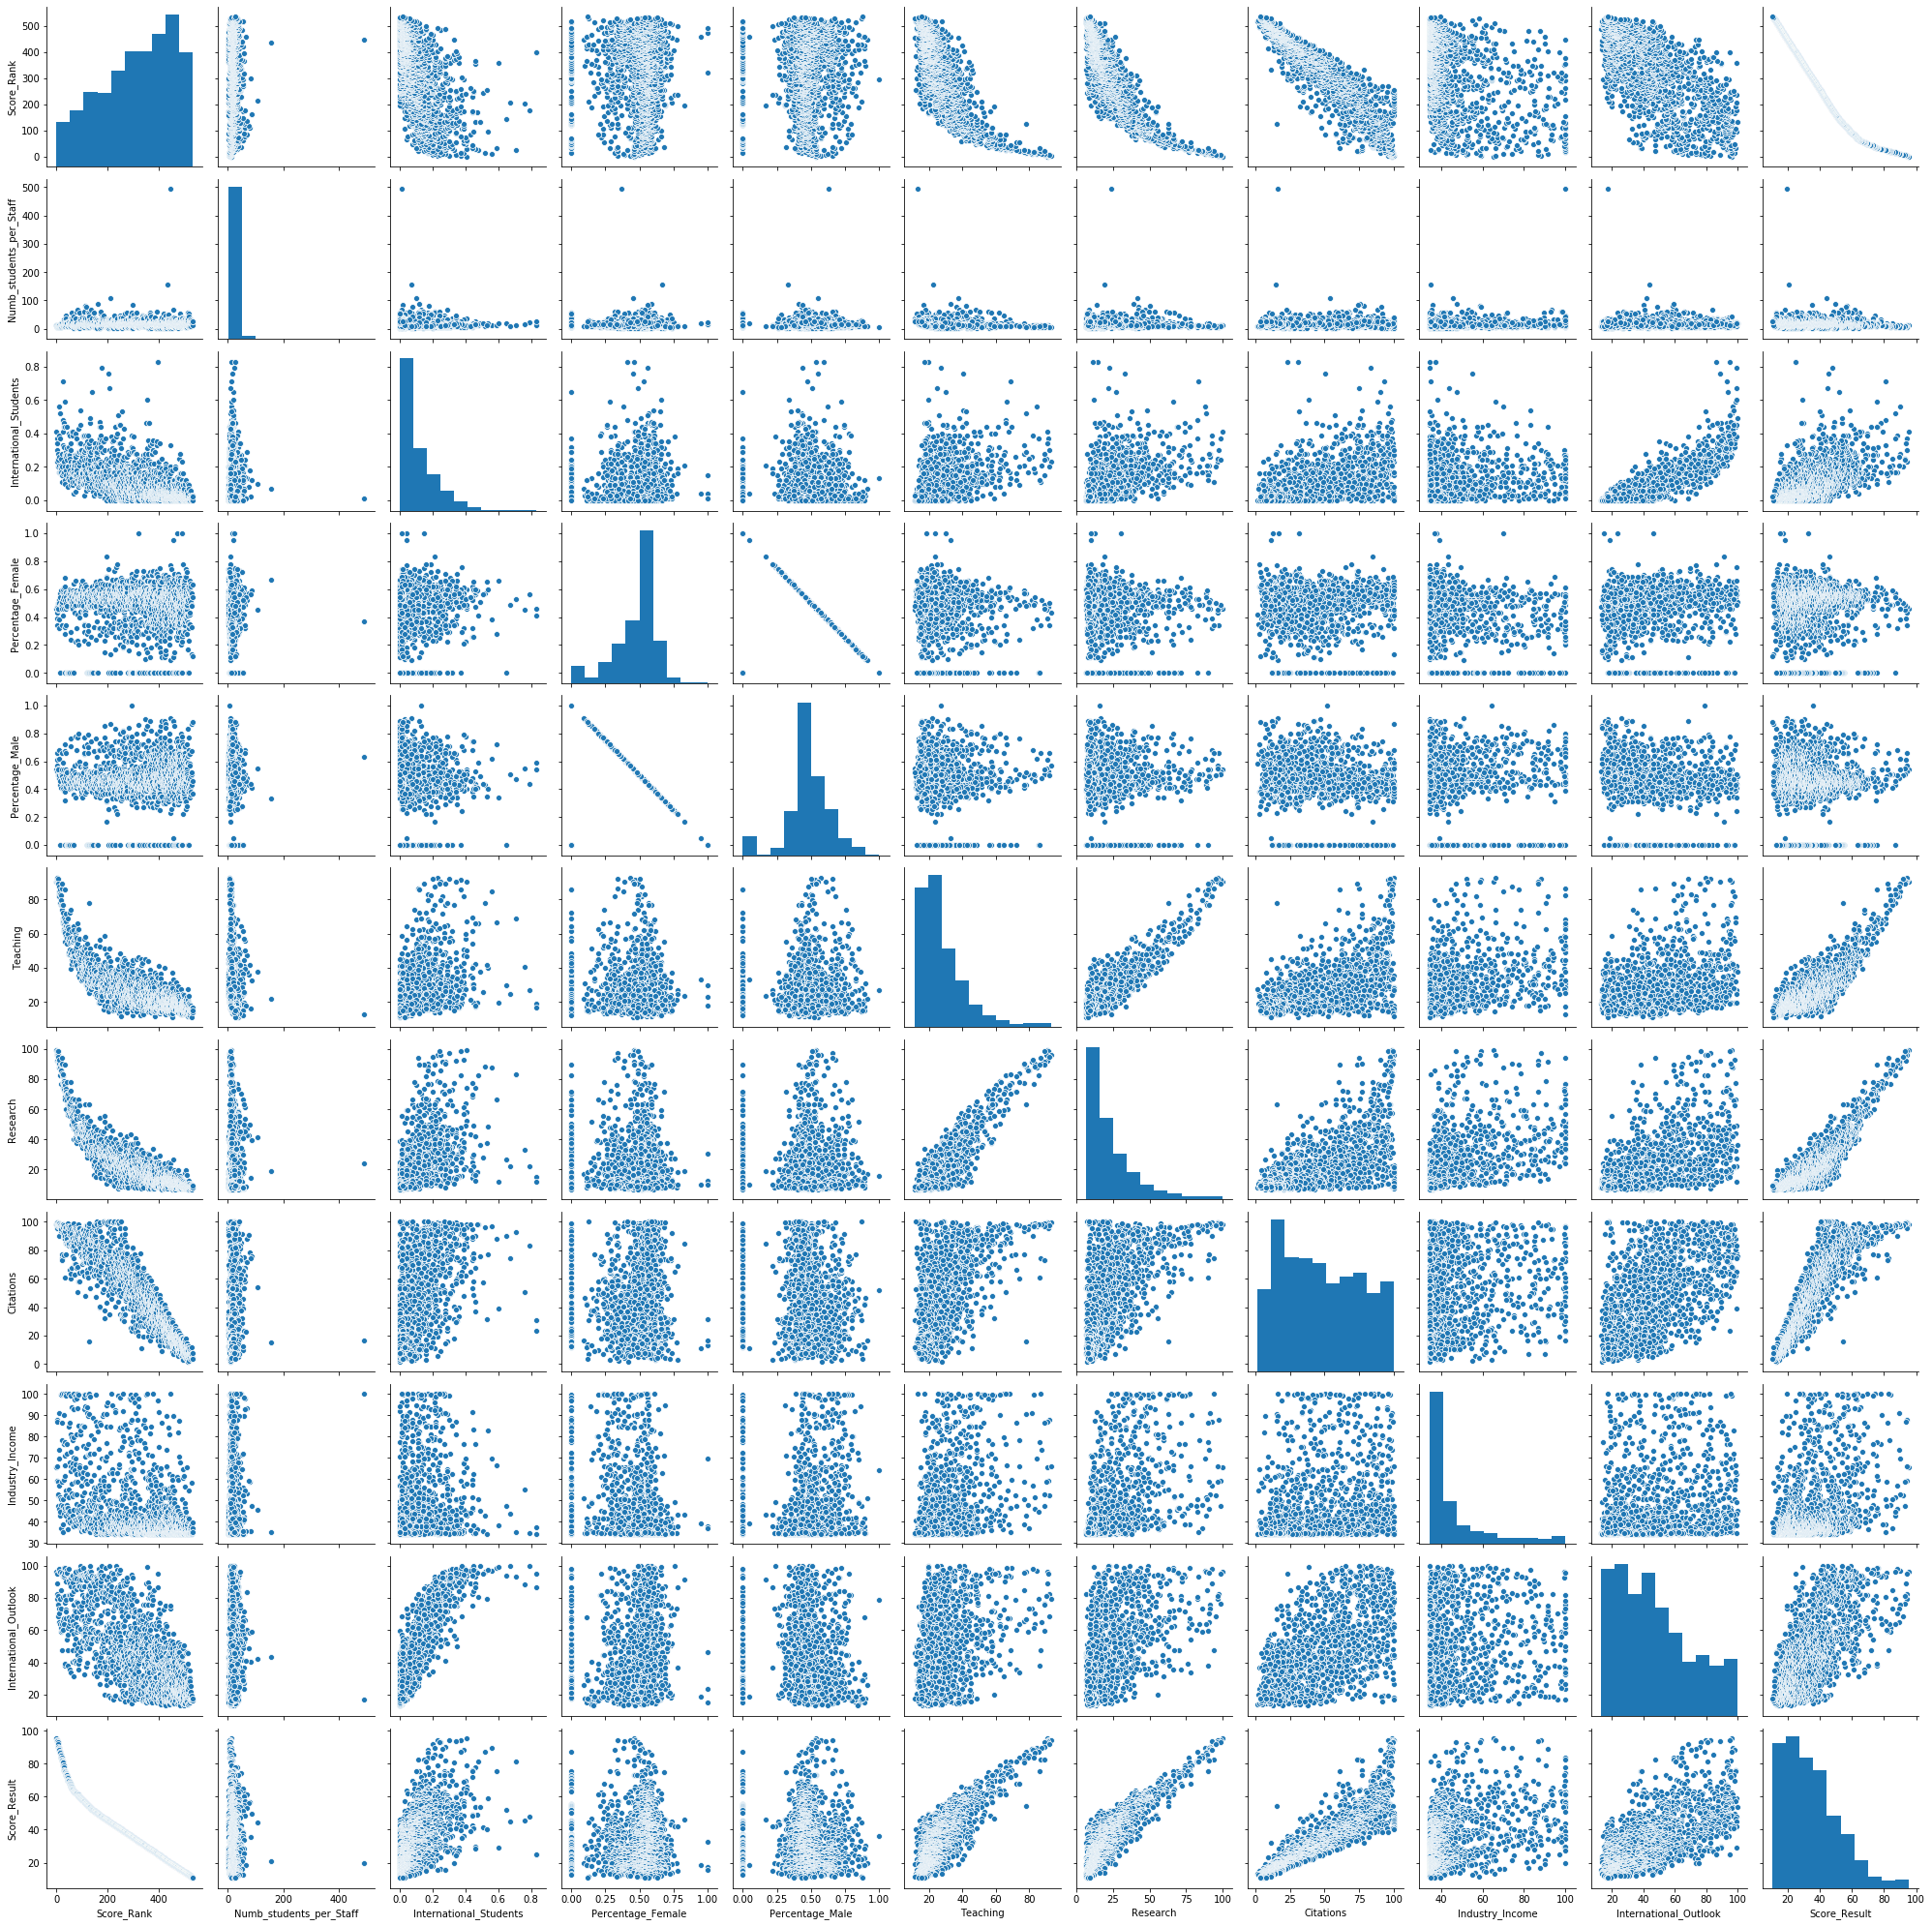

In [145]:
sns.pairplot(factors)

- Has some correlation
    - teaching, research, citations, and international outlook to international students
    - research to teaching
- Has no correlation
    - num students per staff 

## Combining this dataset with country-continent dataset

In [146]:
countries = pd.read_csv("country.csv") 

In [147]:
countries.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


[Cyprus is sometimes placed in Europe, Asia or even in the Middle East. Geographically, Cyprus is closer to Asia but is historically and culturally a European country.](https://www.worldatlas.com/articles/is-cyprus-in-europe-or-asia.html)

In [148]:
additional_countries = pd.DataFrame({'Country' : ['United States', 'Hong Kong', 'Taiwan', 'Macao',
       'Brunei Darussalam', 'Czech Republic', 'Puerto Rico',
       'Northern Cyprus'] , 'Continent': ['North America','Asia','Asia','Asia','Asia','Europe','North America', 'Europe']})

In [149]:
countries = pd.concat([countries, additional_countries], axis=0, sort=True)

In [150]:
data = data.merge(countries, on='Country', how="left")

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1395
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   object 
 1   Score_Rank               1396 non-null   int64  
 2   University               1396 non-null   object 
 3   Country                  1396 non-null   object 
 4   Number_students          1396 non-null   object 
 5   Numb_students_per_Staff  1396 non-null   float64
 6   International_Students   1396 non-null   float64
 7   Percentage_Female        1396 non-null   float64
 8   Percentage_Male          1396 non-null   float64
 9   Teaching                 1396 non-null   float64
 10  Research                 1396 non-null   float64
 11  Citations                1396 non-null   float64
 12  Industry_Income          1396 non-null   float64
 13  International_Outlook    1396 non-null   float64
 14  Score_Result            

In [152]:
data[data['Continent'].isnull()].Country.unique()

array([], dtype=object)

### Which countries have the highest average score result?

In [153]:
country_continent_group_by = data.groupby(['Continent', 'Country']).agg({'Score_Result':'mean', 'University': 'count'}).reset_index()

In [154]:
country_continent_group_by.rename(columns={'Score_Result':'Score_Result_Average', 'University': 'Count_of_Universities'}, inplace=True)

In [155]:
display(country_continent_group_by.sort_values(by='Score_Result_Average'))

,Continent,Country,Score_Result_Average,Count_of_Universities
52,Europe,Georgia,12.900000,1
63,Europe,Montenegro,15.400000,1
91,South America,Venezuela,15.550000,2
10,Asia,Bangladesh,16.300000,1
81,North America,Mexico,16.535294,17
...,...,...,...,...
43,Europe,Belgium,54.312500,8
74,Europe,Switzerland,57.390909,11
64,Europe,Netherlands,61.492308,13
13,Asia,Hong Kong,62.416667,6


In [156]:
data[data['Continent']=='Oceania']

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking,Continent
32,32,30,University of Melbourne,Australia,"47,385",26.3,0.46,0.56,0.44,65.9,74.1,89.8,76.3,93.1,77.8,77.80,Oceania
49,50,43,Australian National University,Australia,"17,359",17.8,0.44,0.52,0.48,54.4,69.7,88.4,46.4,95.5,72.1,72.10,Oceania
59,60,51,University of Sydney,Australia,"45,111",20.1,0.39,0.58,0.42,51.0,61.5,90.7,67.7,89.2,69.3,69.30,Oceania
65,66,56,University of Queensland,Australia,"39,144",35.7,0.34,0.55,0.45,49.3,58.7,86.8,80.9,92.5,67.4,67.40,Oceania
70,71,60,UNSW Sydney,Australia,"44,336",35.7,0.41,0.47,0.53,50.2,58.2,82.9,57.9,93.7,65.9,65.90,Oceania
74,75,63,Monash University,Australia,"52,989",33.9,0.39,0.57,0.43,47.3,56.6,83.8,67.2,89.9,64.7,64.70,Oceania
119,120,92,University of Adelaide,Australia,"21,093",29.9,0.29,0.49,0.51,34.3,41.6,95.3,64.8,91.7,59.9,59.90,Oceania
131,131,99,University of Western Australia,Australia,"18,400",23.2,0.29,0.49,0.51,32.5,43.9,91.0,57.0,94.3,58.7,58.70,Oceania
178,179,122,University of Auckland,New Zealand,"32,821",22.1,0.32,0.56,0.44,31.4,43.9,80.2,62.4,94.0,55.3,55.20,Oceania
181,179,123,Queensland University of Technology,Australia,"34,871",38.2,0.16,0.54,0.46,31.9,40.3,86.4,62.4,81.4,55.2,55.20,Oceania


In [157]:
data[(data['Continent']=='Asia') & (data['Country']=='Singapore')]

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking,Continent
24,25,24,National University of Singapore,Singapore,"30,869",17.9,0.28,0.51,0.49,76.8,90.4,76.9,58.8,95.5,81.9,81.90,Asia
48,48,42,"Nanyang Technological University, Singapore",Singapore,"25,088",15.9,0.27,0.48,0.52,57.6,70.4,84.9,76.5,95.1,72.9,72.90,Asia


### Which continent has the highest average score result?

In [158]:
continent_group_by = data.groupby(['Continent']).agg({'Score_Result':'mean', 'University': 'count', 'Percentage_Female' : 'sum', 'Percentage_Male': 'sum', 'International_Students' : 'mean'}).reset_index()
continent_group_by.rename(columns={'Score_Result':'Score_Result_Average', 'University': 'Count_of_Universities'}, inplace=True)
continent_group_by['Percentage_Female_agg'] = continent_group_by['Percentage_Female']/(continent_group_by['Percentage_Female'] + continent_group_by['Percentage_Male'])
continent_group_by['Percentage_Male_agg'] = continent_group_by['Percentage_Male']/(continent_group_by['Percentage_Female'] + continent_group_by['Percentage_Male'])
continent_group_by = continent_group_by.drop('Percentage_Female', 1)
continent_group_by = continent_group_by.drop('Percentage_Male', 1)
display(continent_group_by.sort_values(by="Score_Result_Average"))

,Continent,Score_Result_Average,Count_of_Universities,International_Students,Percentage_Female_agg,Percentage_Male_agg
5,South America,21.132500,80,0.013375,0.512078,0.487922
0,Africa,25.835714,56,0.027143,0.541964,0.458036
1,Asia,27.307955,528,0.066174,0.446626,0.553374
2,Europe,39.774893,466,0.170687,0.532539,0.467461
3,North America,46.611211,223,0.130404,0.518779,0.481221
4,Oceania,48.537209,43,0.285349,0.561190,0.438810


### Which continent has the highest number of universities?

In [159]:
display(continent_group_by.sort_values(by="Count_of_Universities"))

,Continent,Score_Result_Average,Count_of_Universities,International_Students,Percentage_Female_agg,Percentage_Male_agg
4,Oceania,48.537209,43,0.285349,0.561190,0.438810
0,Africa,25.835714,56,0.027143,0.541964,0.458036
5,South America,21.132500,80,0.013375,0.512078,0.487922
3,North America,46.611211,223,0.130404,0.518779,0.481221
2,Europe,39.774893,466,0.170687,0.532539,0.467461
1,Asia,27.307955,528,0.066174,0.446626,0.553374


### What's the female to male ratio in the top 1396 universities per continent?

In [160]:
display(continent_group_by.sort_values(by="Percentage_Female_agg"))

,Continent,Score_Result_Average,Count_of_Universities,International_Students,Percentage_Female_agg,Percentage_Male_agg
1,Asia,27.307955,528,0.066174,0.446626,0.553374
5,South America,21.132500,80,0.013375,0.512078,0.487922
3,North America,46.611211,223,0.130404,0.518779,0.481221
2,Europe,39.774893,466,0.170687,0.532539,0.467461
0,Africa,25.835714,56,0.027143,0.541964,0.458036
4,Oceania,48.537209,43,0.285349,0.561190,0.438810


## What's the difference between the top 360 and bottom 360?

In [161]:
# data[:10]
top_360 = data[:360]
lowest_360 = data[data['Rank_Char'] == '1001+']
display(top_360)

## unfinished

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking,Continent
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.40,Europe
1,2,2,California Institute of Technology,United States,"2,240",6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.50,North America
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.40,Europe
3,4,4,Stanford University,United States,"16,135",7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.30,North America
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,0.34,0.39,0.61,90.5,92.4,99.5,86.9,89.0,93.6,93.60,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,351-400,214,TU Dortmund University,Germany,"34,267",108.8,0.10,0.45,0.55,37.6,41.4,54.2,45.8,42.2,44.3,42.4-44.4,Europe
356,351-400,214,University of Turku,Finland,"12,785",16.3,0.06,0.63,0.37,27.1,30.8,73.5,37.3,52.6,44.3,42.4-44.4,Europe
357,351-400,214,Wuhan University,China,"52,502",14.6,0.07,0.00,0.00,44.0,34.0,52.5,84.7,40.4,44.3,42.4-44.4,Asia
358,351-400,215,Universit- de Versailles Saint-Quentin-en-Yvel...,France,"16,621",21.2,0.15,0.59,0.41,17.3,21.1,89.9,35.4,64.2,44.2,42.4-44.4,Europe


## Combining this data set with a country population, area, density, and gdp datasets

1. Population data : https://worldpopulationreview.com/ (downloaded June 10, 2020 11:33 PM Philippine Standard Time)

In [162]:
population_per_country_data = pd.read_csv("population_per_country.csv") 

In [163]:
population_per_country_data.head() 

,cca2,name,pop2020,area,Density,GrowthRate,WorldPercentage,rank,pop2019,pop2050,pop2030,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970
0,CN,China,1439323.776,9706961.0,148.2775,1.0039,0.1847,1,1433783.686,1402405.170,1464340.159,1406847.870,1368810.615,1290550.765,1176883.674,1000089.235,827601.394
1,IN,India,1380004.385,3287590.0,419.7617,1.0099,0.1770,2,1366417.754,1639176.033,1503642.322,1310152.403,1234281.170,1056575.549,873277.798,698952.844,555189.792
2,US,United States,331002.651,9372610.0,35.3160,1.0059,0.0425,3,329064.917,379419.102,349641.876,320878.310,309011.475,281710.909,252120.309,229476.354,209513.341
3,ID,Indonesia,273523.615,1904569.0,143.6144,1.0107,0.0351,4,270625.568,330904.664,299198.430,258383.256,241834.215,211513.823,181413.402,147447.836,114793.178
4,PK,Pakistan,220892.340,881912.0,250.4698,1.0200,0.0283,5,216565.318,338013.196,262958.794,199426.964,179424.641,142343.578,107647.921,78054.343,58142.060


In [164]:
population_per_country_data.shape

(232, 17)

In [165]:
population_per_country_data.rename(columns={'name':'Country'}, inplace=True)

2. GDP data downloaded at https://data.worldbank.org/indicator/NY.GDP.MKTP.CD (Last Updated Date: May 28, 2020)


In [166]:
gdp_per_capita_data = pd.read_csv("gdp-files/gdp-data-per-country.csv") 

In [167]:
gdp_per_capita_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09,NaN,NaN


- Indicator Name: NY.GDP.MKTP.CD
- Indicator Code: GDP (current US$)

In [168]:
gdp_per_capita_data = gdp_per_capita_data[['Country Name','Country Code', 'Indicator Name', 'Indicator Code', '2018']]

In [169]:
gdp_per_capita_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   2018            239 non-null    float64
dtypes: float64(1), object(4)
memory usage: 10.4+ KB


In [170]:
gdp_per_capita_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   2018            239 non-null    float64
dtypes: float64(1), object(4)
memory usage: 10.4+ KB


In [171]:
# Rename Country Name to Country
gdp_per_capita_data.rename(columns={'Country Name':'Country'}, inplace=True)

In [172]:
country_continent_group_by = country_continent_group_by.merge(gdp_per_capita_data[['Country', '2018']], on='Country')

In [173]:
country_continent_group_by = country_continent_group_by.merge(population_per_country_data[['Country', 'pop2020', 'area', 'Density']], on='Country')

In [174]:
display(country_continent_group_by)
print(country_continent_group_by.info())

,Continent,Country,Score_Result_Average,Count_of_Universities,2018,pop2020,area,Density
0,Africa,Algeria,18.162500,8,1.737580e+11,43851.044,2381741.0,18.4113
1,Africa,Ghana,22.700000,1,6.555646e+10,31072.940,238533.0,130.2668
2,Africa,Kenya,26.300000,1,8.790826e+10,53771.296,580367.0,92.6505
3,Africa,Morocco,21.175000,4,1.179214e+11,36910.560,446550.0,82.6572
4,Africa,Nigeria,30.625000,4,3.972696e+11,206139.589,923768.0,223.1508
...,...,...,...,...,...,...,...,...
76,South America,Argentina,17.750000,4,5.198715e+11,45195.774,2780400.0,16.2551
77,South America,Brazil,19.986957,46,1.885483e+12,212559.417,8515767.0,24.9607
78,South America,Chile,23.811111,18,2.982311e+11,19116.201,756102.0,25.2826
79,South America,Colombia,22.450000,8,3.310470e+11,50882.891,1141748.0,44.5658


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Continent              81 non-null     object 
 1   Country                81 non-null     object 
 2   Score_Result_Average   81 non-null     float64
 3   Count_of_Universities  81 non-null     int64  
 4   2018                   81 non-null     float64
 5   pop2020                81 non-null     float64
 6   area                   81 non-null     float64
 7   Density                81 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.7+ KB
None


## Is there a correlation between this dataset's features to a country's population, area, density, and gdp?

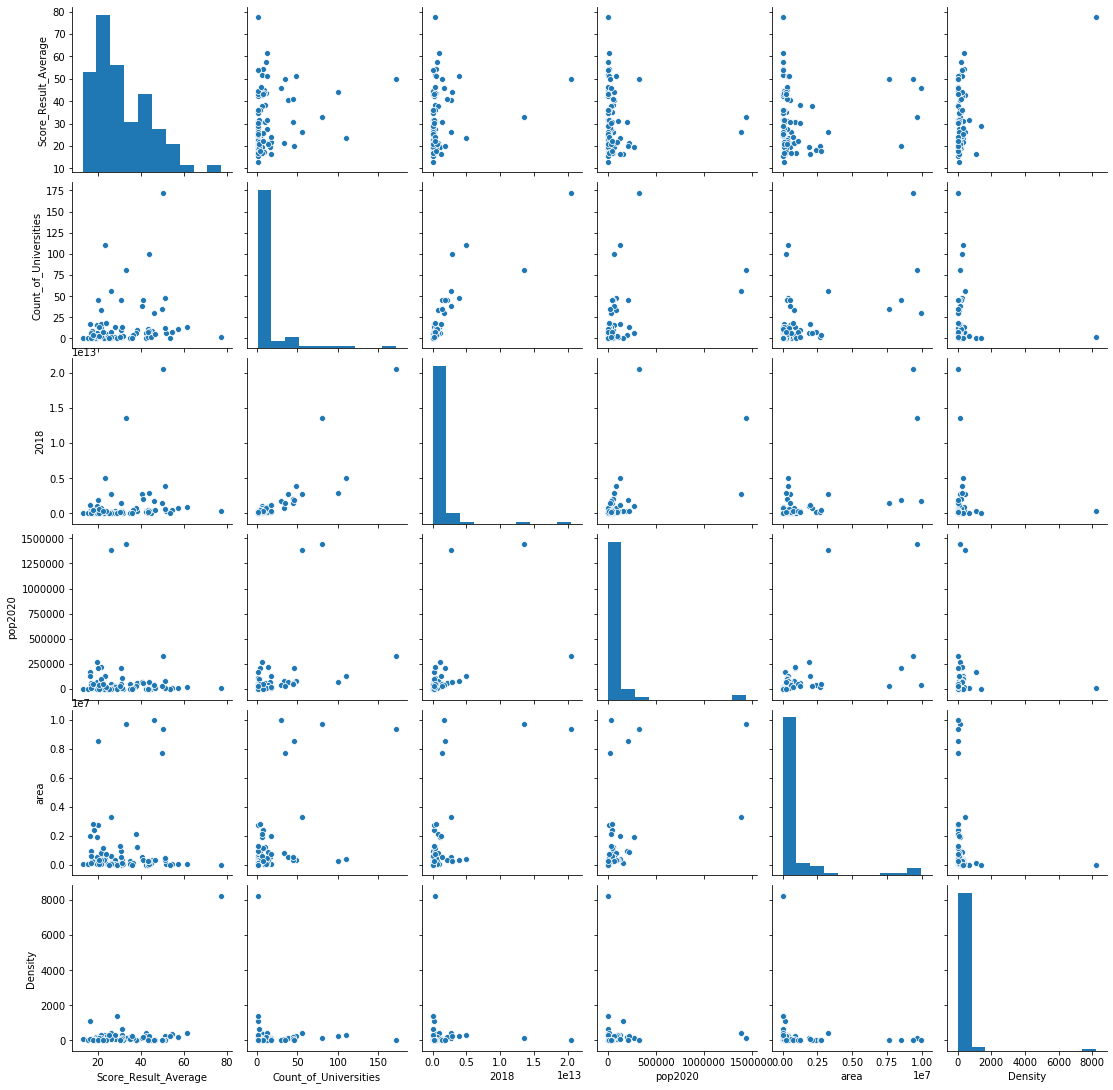

In [175]:
correlation_of_score_gdp_and_pop = country_continent_group_by[['Continent', 'Country', 'Score_Result_Average', 'Count_of_Universities', '2018', 'pop2020', 'area', 'Density']]
sns.pairplot(correlation_of_score_gdp_and_pop)

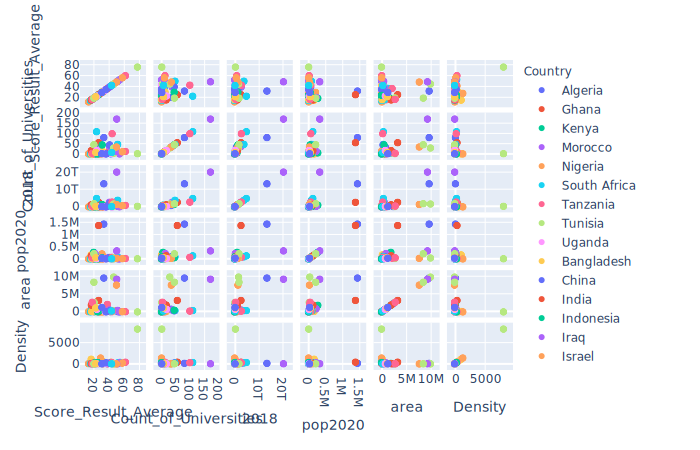

In [176]:
import plotly.express as px
import plotly.io as pio
fig = px.scatter_matrix(correlation_of_score_gdp_and_pop,
    dimensions=["Score_Result_Average", "Count_of_Universities", "2018", 'pop2020', 'area', 'Density'],
    color="Country")
#fig.show()
fig.show(renderer="svg")

- Somewhat has correlation
    - area and count of univ
    - count of univ, score result ave
    - gdp and count of univ

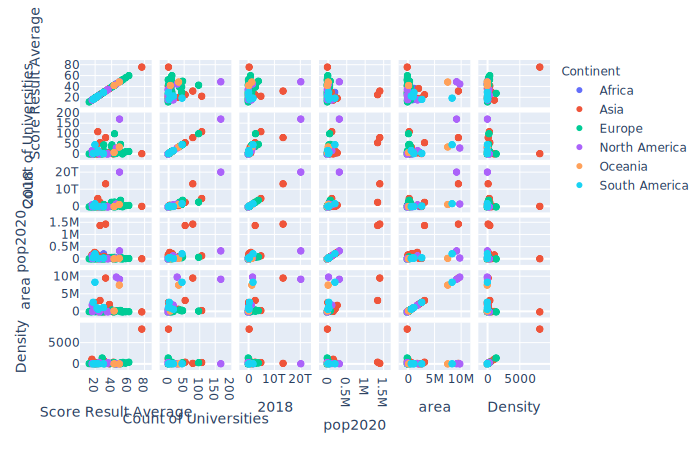

In [177]:
import plotly.express as px

fig = px.scatter_matrix(correlation_of_score_gdp_and_pop,
    dimensions=["Score_Result_Average", "Count_of_Universities", "2018", 'pop2020', 'area', 'Density'],
    color="Continent",
   labels={col:col.replace('_', ' ') for col in correlation_of_score_gdp_and_pop.columns})
# fig.show()
fig.show(renderer="svg")

## Export data

In [194]:
continent_group_by.to_csv("output_files/continent_agg.csv", index=False)

In [195]:
country_continent_group_by.rename(columns={'2018':'gdp_2018', 'pop': 'pop_2020'}, inplace=True)

In [196]:
country_continent_group_by.to_csv("output_files/country_agg.csv", index=False)

In [197]:
data_merged_with_continent_groupby = data.merge(continent_group_by, on='Continent', how='left')

In [198]:
data_merged_with_continent_groupby.to_csv("output_files/univ_agg_with_continent.csv", index=False)

In [203]:
data

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking,Continent
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.40,Europe
1,2,2,California Institute of Technology,United States,"2,240",6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.50,North America
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.40,Europe
3,4,4,Stanford University,United States,"16,135",7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.30,North America
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,0.34,0.39,0.61,90.5,92.4,99.5,86.9,89.0,93.6,93.60,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1001+,531,Cear- State University,Brazil,"20,174",17.8,0.00,0.55,0.45,16.2,8.3,6.1,35.6,16.3,11.3,10.7-22.1,South America
1392,1001+,532,Pontifical Catholic University of Minas Gerais,Brazil,"34,101",21.3,0.00,0.57,0.43,15.3,7.7,6.7,35.1,19.4,11.2,10.7-22.1,South America
1393,1001+,533,Bashkir State University,Russian Federation,"15,236",11.1,0.03,0.63,0.37,17.0,8.1,4.5,36.9,16.7,11.1,10.7-22.1,Asia
1394,1001+,534,University of Caxias do Sul,Brazil,"17,101",24.9,0.00,0.54,0.46,13.8,7.8,7.6,35.0,17.7,11.0,10.7-22.1,South America


In [207]:
country_univ_group_by = data.groupby(['Country']).agg({'Score_Result':'mean', 'University': 'count', 'Percentage_Female' : 'sum', 'Percentage_Male': 'sum', 'International_Students' : 'mean'}).reset_index()
country_univ_group_by.rename(columns={'Score_Result':'Score_Result_Average', 'University': 'Count_of_Universities'}, inplace=True)
#country_univ_group_by['Percentage_Female_agg'] = country_univ_group_by['Percentage_Female']/(continent_group_by['Percentage_Female'] + continent_group_by['Percentage_Male'])
#country_univ_group_by['Percentage_Male_agg'] = country_univ_group_by['Percentage_Male']/(continent_group_by['Percentage_Female'] + continent_group_by['Percentage_Male'])
#country_univ_group_by = country_univ_group_by.drop('Percentage_Female', 1)
#country_univ_group_by = country_univ_group_by.drop('Percentage_Male', 1)
#display(country_univ_group_by.sort_values(by="Score_Result_Average"))

In [205]:
country_univ_group_by

,Country,Score_Result_Average,Count_of_Universities,Percentage_Female,Percentage_Male,International_Students
0,Algeria,18.162500,8,4.78,3.22,0.007500
1,Argentina,17.750000,4,2.52,1.48,0.025000
2,Australia,49.717143,35,19.08,14.92,0.283714
3,Austria,43.472727,11,5.39,5.61,0.250000
4,Bangladesh,16.300000,1,0.42,0.58,0.000000
...,...,...,...,...,...,...
87,United Arab Emirates,36.175000,4,2.50,1.50,0.475000
88,United Kingdom,43.945000,100,55.88,44.12,0.284400
89,United States,50.108140,172,84.79,81.21,0.134070
90,Venezuela,15.550000,2,1.04,0.96,0.000000
